In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import ipywidgets

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 16

# NOTES
- lowest order truncated term is even: diffusion
- lowest order truncated term is odd:  dispersion

In [9]:
alpha = 0.00122 #[m^2/sec]
L = 1.0 #[m]
nx = 51
dx = L / (nx-1)
x = np.linspace(0.0, L, nx)
T0 = np.zeros(nx)
T0[0] = 100.0 #[degrees C]

dt = 0.5*dx**2/alpha
nt = 100

In [65]:
def ftcs(T0, nt, dt, dx, alpha):
    
    state = T0.copy()
    for i in range(nt-1):

        state[1:-1] = state[1:-1] + alpha*dt/dx**2 * (state[2:] - 
                                2*state[1:-1] + state[0:-2])

    return state

(0, 100)

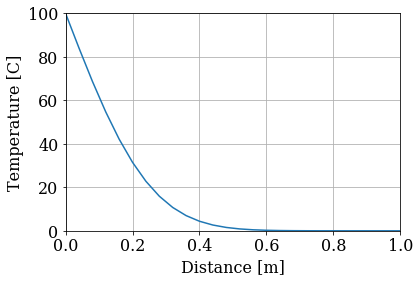

In [67]:
sHist1 = ftcs(T0, nt, dt, dx, alpha)
plt.plot(x,sHist1)
plt.grid()
plt.xlabel("Distance [m]")
plt.ylabel("Temperature [C]")
plt.xlim(0,1)
plt.ylim(0,100)

(0, 100)

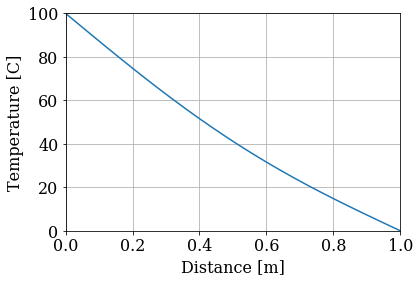

In [61]:
sHist2 = ftcs(T0, 1000, dt, dx, alpha)
plt.plot(x,sHist2[-1][:])
plt.grid()
plt.xlabel("Distance [m]")
plt.ylabel("Temperature [C]")
plt.xlim(0,1)
plt.ylim(0,100)

In [62]:
def ftcs_neumann_boundary(T0, nt, dt, dx, alpha):
    state_hist = [ T0.copy() ]
    state = T0.copy()
    for i in range(nt-1):
        new_state = state.copy()
        new_state[1:-1] = state[1:-1] + alpha*dt/dx**2 * (state[2:] - 
                                2*state[1:-1] + state[0:-2])
        new_state[-1] = new_state[-2]
        state_hist.append(new_state.copy())
        state = new_state.copy()
    return state_hist

(0, 100)

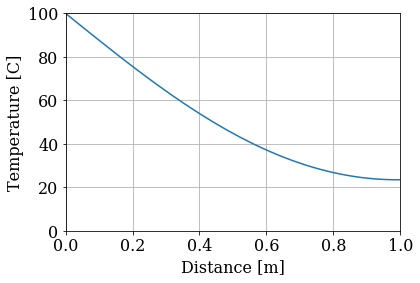

In [60]:
sHist3 = ftcs_neumann_boundary(T0, 1000, dt, dx, alpha)
plt.plot(x,sHist3[-1][:])
plt.grid()
plt.xlabel("Distance [m]")
plt.ylabel("Temperature [C]")
plt.xlim(0,1)
plt.ylim(0,100)

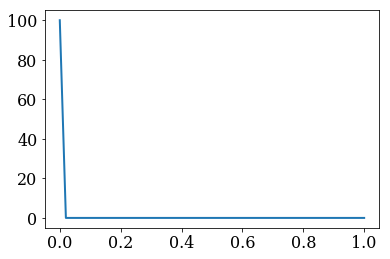

In [50]:
from matplotlib import animation
from IPython.display import HTML

fig = plt.figure(figsize=(6.0, 4.0))
line = plt.plot(x, T0, color='C0', linestyle='-', linewidth=2)[0]

def update_plot(n, state_hist):
    """
    Update the line y-data of the Matplotlib figure.
    
    Parameters
    ----------
    n : integer
        The time-step index.
    rho_hist : list of numpy.ndarray objects
        The history of the numerical solution.
    """
    fig.suptitle('Time step {:0>2}'.format(n))
    line.set_ydata(state_hist[n])

In [42]:
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt, fargs=(sHist1,),
                               interval=100)
# Display the video.
HTML(anim.to_html5_video())